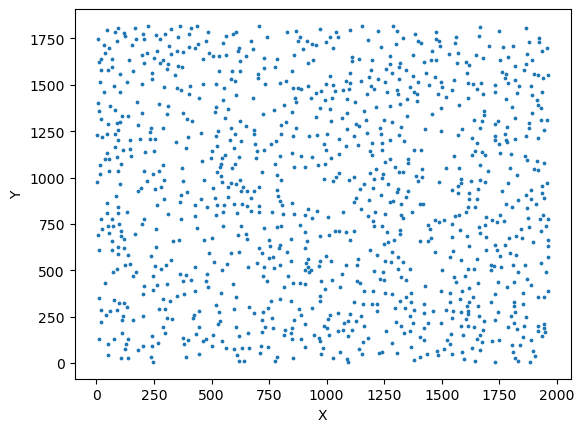

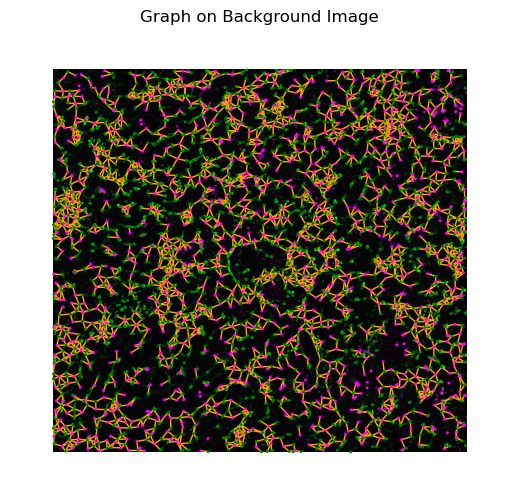

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.spatial import KDTree
import networkx as nx
import matplotlib.image as mpimg

def space(sample, ROI):
    cell_path = 'data/' + sample + ' ' + ROI + '/SegmentedCells.csv'

    DS = pd.read_csv(cell_path)

    xCoord = DS.filter(regex='Location_CenterMassIntensity_X')
    yCoord = DS.filter(regex='Location_CenterMassIntensity_Y')

    Hox = xCoord.filter(regex='Hoechst')
    Hoy = yCoord.filter(regex='Hoechst')

    fivehmcx = xCoord.filter(regex='fivehmc')
    fivehmcy = yCoord.filter(regex='fivehmc')

    fivemcx = xCoord.filter(regex='fivemc')
    fivemcy = yCoord.filter(regex='fivemc')


    # Another folder
    name = ["aSMA", "Calponin", "Fibronectin","PanCyto", "VCAM"]
    stroma_path = []
    for i in range(len(name)):
        stroma_path.append('data/Pixel classification/' + sample + '/' + ROI + '/rest/' + name[i] + 'IdentifyPrimaryObjects.csv')

    aSMA = pd.read_csv(stroma_path[0])
    Calponin = pd.read_csv(stroma_path[1])
    Fibronectin = pd.read_csv(stroma_path[2])
    PanCyto = pd.read_csv(stroma_path[3])
    VCAM = pd.read_csv(stroma_path[4])
    Collagen = pd.read_csv('data/Pixel classification/' + sample + '/' + ROI + '/IdentifyPrimaryObjects.csv')


    smax = aSMA.filter(regex='Location_CenterMassIntensity_X_cell')
    smay = aSMA.filter(regex='Location_CenterMassIntensity_Y_cell')

    calpoX = Calponin.filter(regex='Location_CenterMassIntensity_X_cell')
    calpoY = Calponin.filter(regex='Location_CenterMassIntensity_Y_cell')

    fibrox = Fibronectin.filter(regex='Location_CenterMassIntensity_X_cell')
    fibroy = Fibronectin.filter(regex='Location_CenterMassIntensity_Y_cell')

    panx = PanCyto.filter(regex='Location_CenterMassIntensity_X_cell')
    pany = PanCyto.filter(regex='Location_CenterMassIntensity_Y_cell')

    VCAMX = VCAM.filter(regex='Location_CenterMassIntensity_X_cell')
    VCAMY = VCAM.filter(regex='Location_CenterMassIntensity_Y_cell')

    collagenx = Collagen.filter(regex='Location_CenterMassIntensity_X_try')
    collageny = Collagen.filter(regex='Location_CenterMassIntensity_Y_try')


    # Put them all together
    col = pd.concat([collagenx,collageny], axis=1)
    col['name'] = 1
    col = col.rename(columns={"Location_CenterMassIntensity_X_try": "X", "Location_CenterMassIntensity_Y_try": "Y"})

    fibro = pd.concat([fibrox,fibroy], axis=1)
    fibro['name'] = 2
    fibro = fibro.rename(columns={"Location_CenterMassIntensity_X_cell": "X", "Location_CenterMassIntensity_Y_cell": "Y"})

    hoechst = pd.concat([Hox,Hoy], axis=1)
    hoechst['name'] = 3
    hoechst = hoechst.rename(columns={"Location_CenterMassIntensity_X_Hoechst": "X", "Location_CenterMassIntensity_Y_Hoechst": "Y"})

    pancyto = pd.concat([panx,pany], axis=1)
    pancyto['name'] = 4
    pancyto = pancyto.rename(columns={"Location_CenterMassIntensity_X_cell": "X", "Location_CenterMassIntensity_Y_cell": "Y"})

    asma = pd.concat([smax,smay], axis=1)
    asma['name'] = 5
    asma = asma.rename(columns={"Location_CenterMassIntensity_X_cell": "X", "Location_CenterMassIntensity_Y_cell": "Y"})

    fivehmc = pd.concat([fivehmcx,fivehmcy], axis=1)
    fivehmc['name'] = 6
    fivehmc = fivehmc.rename(columns={"Location_CenterMassIntensity_X_fivehmc": "X", "Location_CenterMassIntensity_Y_fivehmc": "Y"})

    fivemc = pd.concat([fivemcx,fivemcy], axis=1)
    fivemc['name'] = 7
    fivemc = fivemc.rename(columns={"Location_CenterMassIntensity_X_fivemc": "X", "Location_CenterMassIntensity_Y_fivemc": "Y"})

    calponin = pd.concat([calpoX,calpoY], axis=1)
    calponin['name'] = 8
    calponin = calponin.rename(columns={"Location_CenterMassIntensity_X_cell": "X", "Location_CenterMassIntensity_Y_cell": "Y"})

    VCAM = pd.concat([VCAMX,VCAMY], axis=1)
    VCAM['name'] = 9
    VCAM = VCAM.rename(columns={"Location_CenterMassIntensity_X_cell": "X", "Location_CenterMassIntensity_Y_cell": "Y"})


    new = pd.concat([col, fibro, hoechst,  pancyto, asma, fivehmc, fivemc, calponin, VCAM])
    
    new = new.dropna()
    return new

def create_graph_with_nodes_and_edges(node_data, edges, image_path):
    # Create a new graph
    G = nx.Graph()

    # Add nodes with their positions and colors
    for node, (position, color) in node_data.items():
        G.add_node(node, pos=position, color=color)

    # Add edges
    G.add_edges_from(edges)

    # Draw the graph
    pos = nx.get_node_attributes(G, 'pos')
    colors = [G.nodes[node]['color'] for node in G.nodes()]

    # Load the background image
    img = mpimg.imread(image_path)

    # Create a new figure
    plt.figure(figsize=(8, 6))  # Adjust the size as needed
    plt.imshow(img, cmap='gray')  # Adjust extent to match your image dimensions

    # Plot the graph on top of the image
    nx.draw(G, pos, with_labels=False, node_size=1, node_color=colors,edge_color='orange', font_size=10, font_weight='bold')

    # Show the plot
    plt.title("Graph on Background Image")
    plt.axis('off')  # Optionally turn off the axis
    plt.show()


# path = 'data/1L R3/SegmentedCells.csv'
Dataset = space('7L', 'R3')

marker1 = Dataset[Dataset['name'] ==7]
marker2 = Dataset[Dataset['name'] ==2]

kd_tree1 = KDTree(marker1[['X', 'Y']])
kd_tree2 = KDTree(marker2[['X', 'Y']])
indexes = kd_tree1.query_ball_tree(kd_tree2, r=50)

node_data = {}
edges = []
for row in marker1.itertuples(index=True):
    node_data[f"magenta{row.Index}"] = ((row.X, row.Y),'magenta')
for row in marker2.itertuples(index=True):
    node_data[f"green{row.Index}"] = ((row.X, row.Y),'green')   

for index,row in enumerate(indexes):
    for element in row:
        edges.append((f"magenta{index}", f"green{element}"))

image_path = 'data/proximity flatten.jpg' # customize the path to add the figure that needs to overlap with
marker1.plot(x='X', y='Y', kind='scatter', s=3)
create_graph_with_nodes_and_edges(node_data, edges,image_path)
# create_graph_with_nodes_and_edges(node_data, edges)